<a href="https://colab.research.google.com/github/priyachittamuru/EDA/blob/main/updated_EDA_titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  #                             **TITANIC DATASET EDA ANALYSIS**


---

## Detailed Introduction to Titanic Dataset

### train.csv
- **Source**: The train.csv dataset is constructed from historical records of Titanic passengers, supplemented with engineered features to aid in predictive modeling. This data serves as the foundation for training machine learning models in classification tasks.
- **Key Characteristics**:
  - Contains 891 passenger records with attributes such as demographic details, ticket class, and fare.
  - The Survived column, the target variable, indicates whether a passenger survived (1) or perished (0).
  - Features missing data, particularly in columns like Age, Cabin, and occasionally Embarked, necessitating preprocessing steps like imputation or removal.

### test.csv
- **Source**: The test.csv dataset originates from the same historical Titanic passenger records as train.csv, excluding survival outcomes. This allows for independent evaluation of machine learning model predictions.
- **Key Characteristics**:
  - Includes 418 passenger records, designed to match the structure of train.csv while omitting the Survived target variable.
  - Similar to train.csv, it has missing values in key fields such as Age and Cabin, requiring consistent preprocessing.
  - Serves as the input data for generating predictions, essential for competition submissions.


In [ ]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [ ]:
#reading the files from the  uploaded data
data_te = pd.read_csv('/content/test.csv')
data_tr = pd.read_csv('/content/train.csv')

In [ ]:
#finding the datatypes,colums and rows /information of the data provided
data_te.info() , data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [ ]:
#find the mean standard deviation values for numerical data
data_te.describe() , data_tr.describe()


(       PassengerId      Pclass         Age       SibSp       Parch        Fare
 count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
 mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
 std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
 min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
 25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
 50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
 75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
 max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200,
        PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.10274

In [ ]:
#finding null values
data_te.isnull().sum() , data_tr.isnull().sum()

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64)

In [ ]:
# Combine datasets and indentifying null values and replace them with mean, median and mode values
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Identify numerical columns with missing values
numerical_cols_with_missing = combined_data.select_dtypes(include=['number']).columns[combined_data.select_dtypes(include=['number']).isnull().any()]

# Fill numerical missing values with the mean
for col in numerical_cols_with_missing:
    mean_val = combined_data[col].mean()
    combined_data[col].fillna(mean_val, inplace=True)

# Identify categorical columns with missing values
# Similar to the numerical columns, apply any() to only categorical columns.
categorical_cols_with_missing = combined_data.select_dtypes(include=['object']).columns[combined_data.select_dtypes(include=['object']).isnull().any()]

# Fill categorical missing values with the mode
for col in categorical_cols_with_missing:
    mode_val = combined_data[col].mode()[0]  # Get the first mode in case of multiple
    combined_data[col].fillna(mode_val, inplace=True)

# Separate back into train and test sets
data_tr = combined_data.iloc[:data_tr.shape[0], :]
data_te = combined_data.iloc[data_tr.shape[0]:, :]

# Verify that there are no more missing values
print(data_tr.isnull().sum())
print(data_te.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


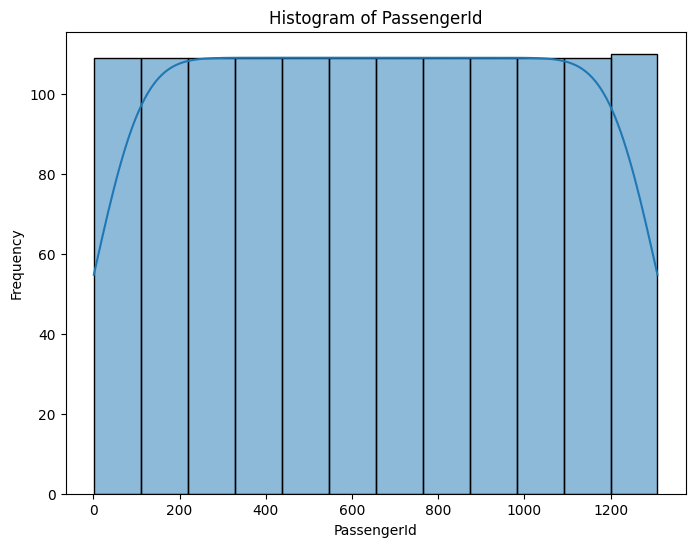

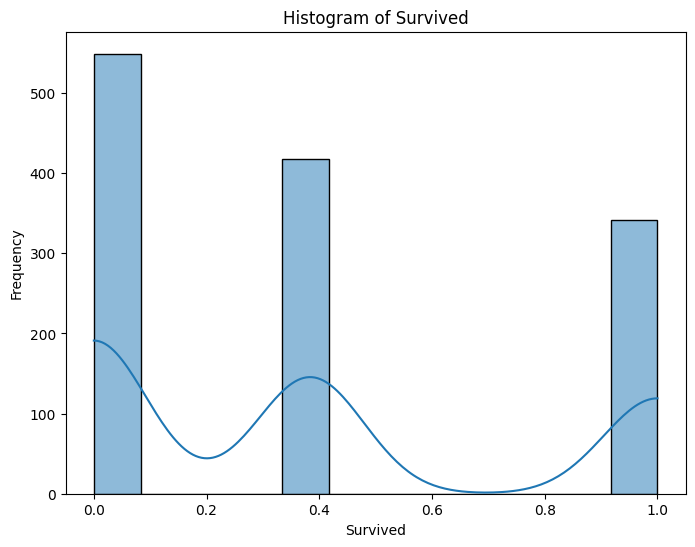

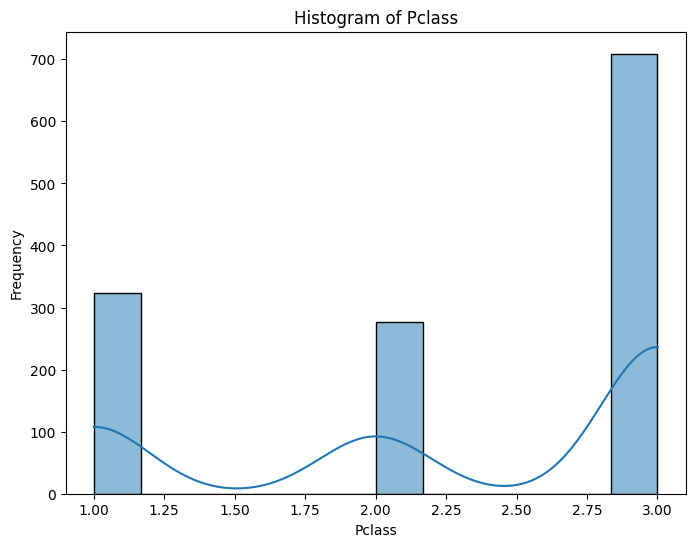

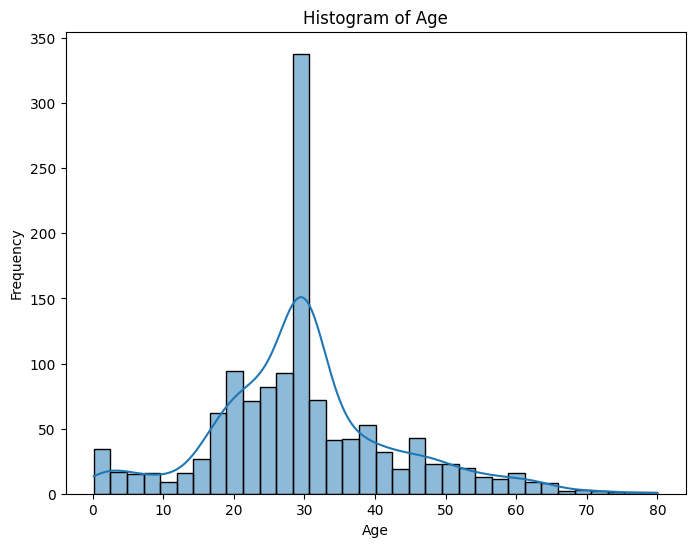

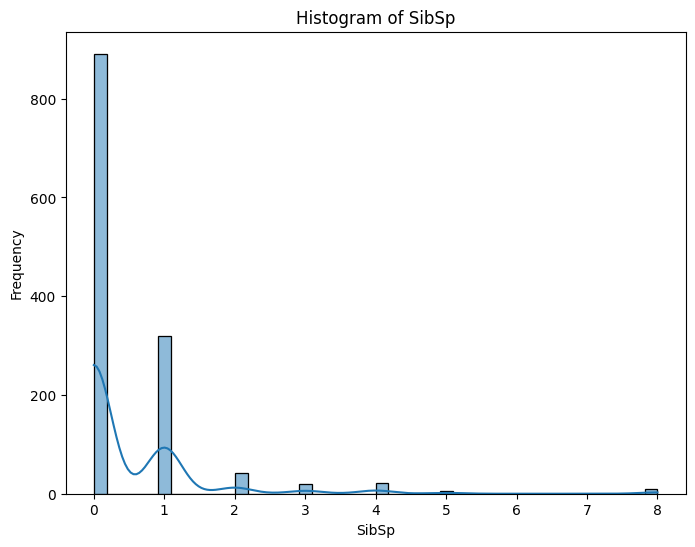

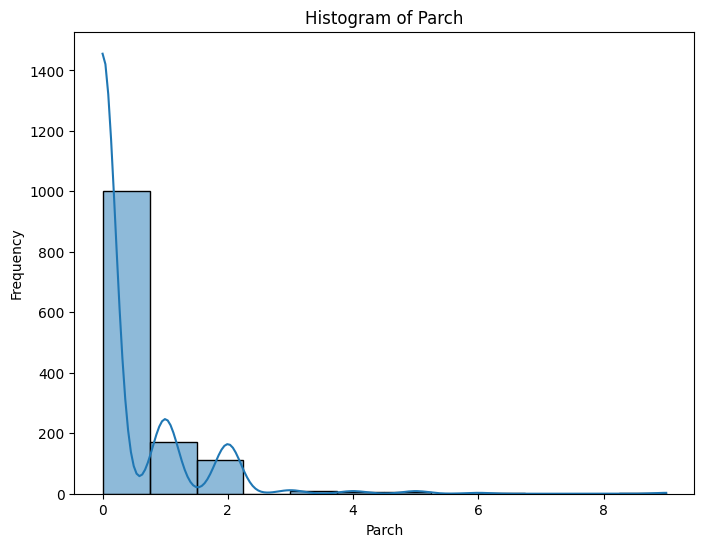

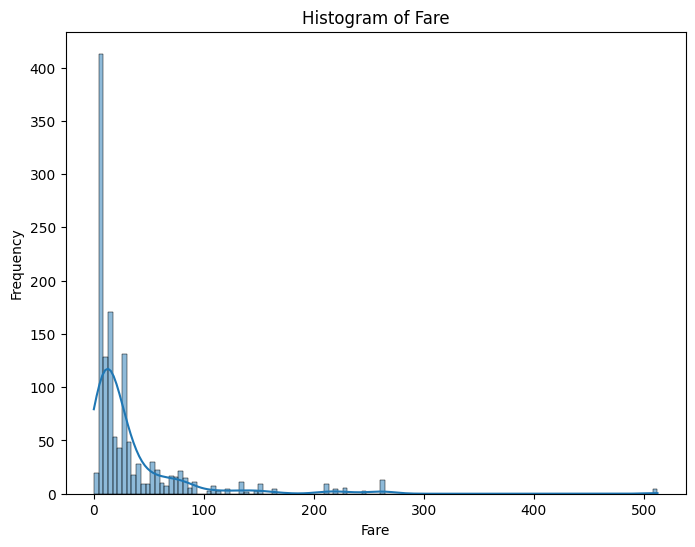

In [ ]:
# Combine both datasets for a complete overview
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Iterate through each column and create a histogram if the data type is numerical
for column in combined_data.columns:
    if pd.api.types.is_numeric_dtype(combined_data[column]):
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.histplot(combined_data[column], kde=True)  # Use seaborn's histplot for better visuals
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
#from histograms we can we observe age, parch, Sibsp, fare are sequed towards right or left which mean it might contain outliers
#* passenger id shows an even distribution across all passenger IDs from 0 to 1200
  #*   age - the mode is 30 which means more people are of that age and age ranges between 0 to 80 and more individuals are present from a range of 20 to 40 years
  #*   survived more than 500 people did not survive and more that 300 people survived
  #*  pclass class 3 has more passenger more than 700 and class 1 and 2 has fewer passengers around 300
  #* sibsp more than 800 people had no sbilings/spouse and around 300 people had 1 sibsp, and the very few has 3 or more sibsp, max number of sibsp is 8
  #* parch more passengers has 0 i.e no parent child relation and max parch value appears to be 9
  #* fare less than 100 comes under low fare and more passengers paid high fare

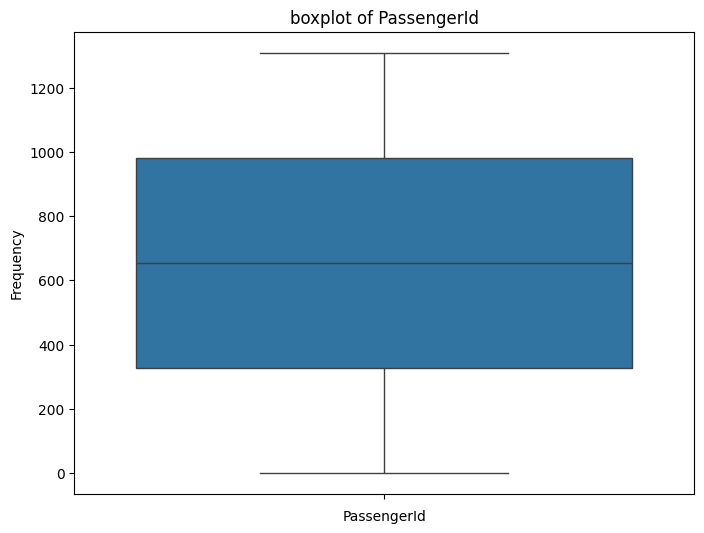

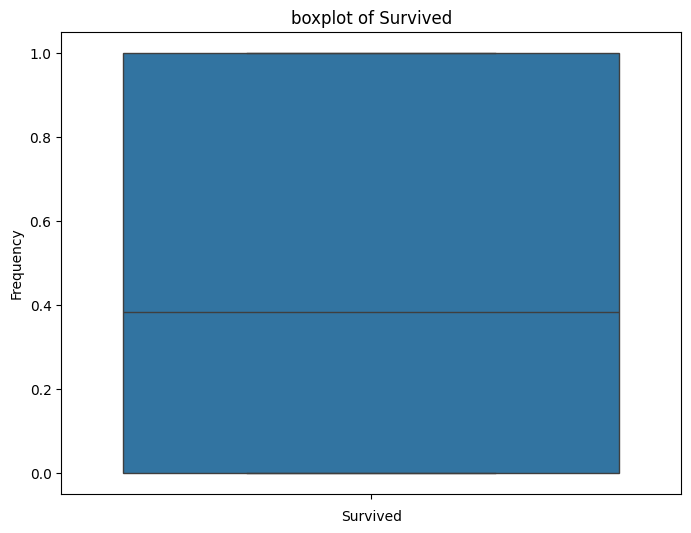

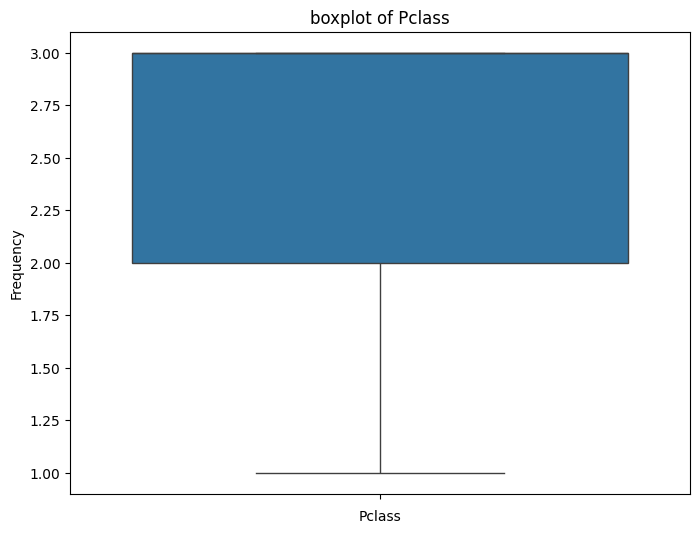

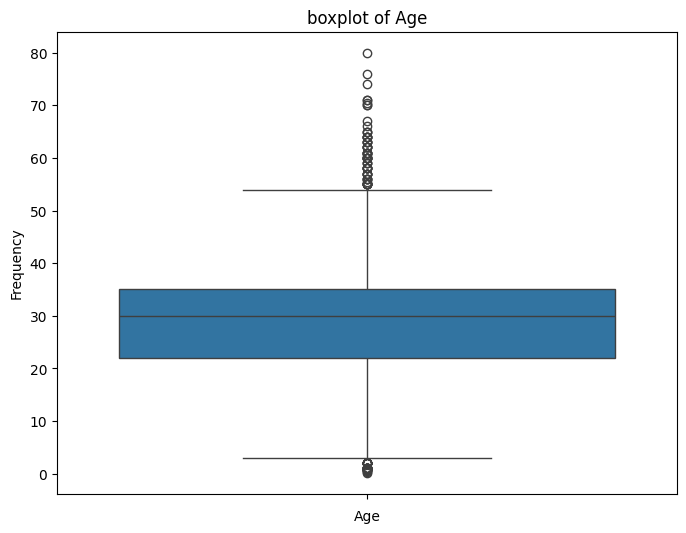

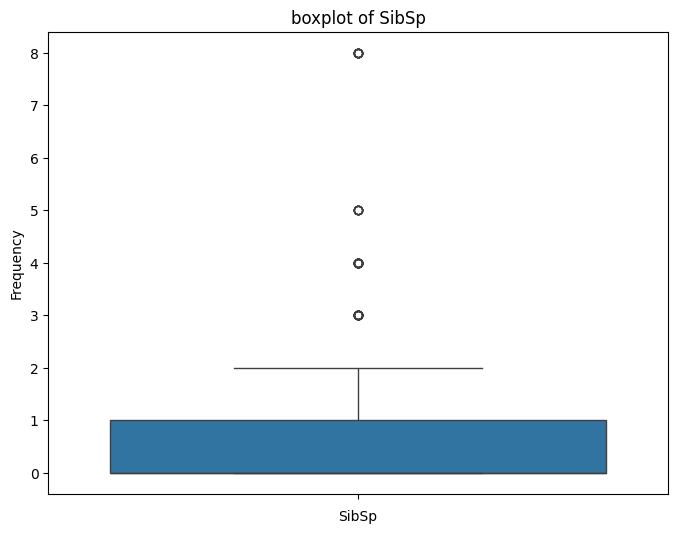

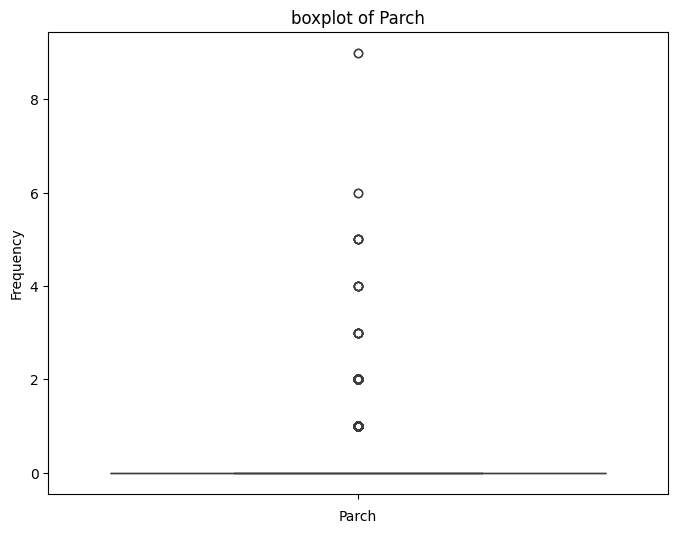

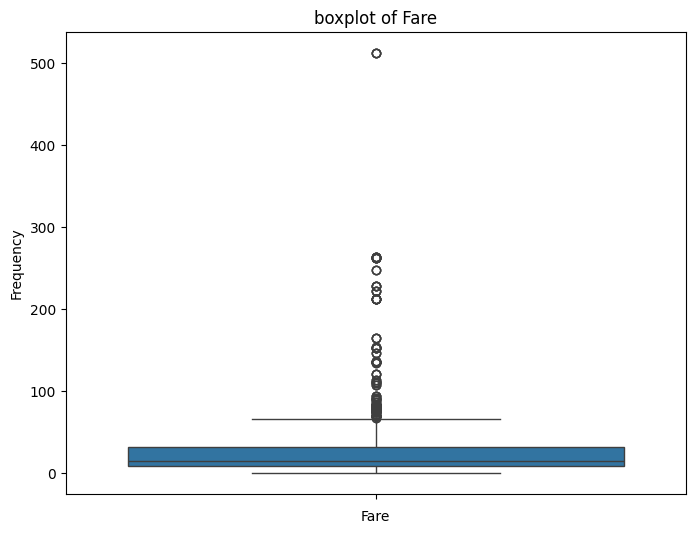

In [ ]:
# Boxplot for numerical data to find outliers
# Combine both datasets for a complete overview
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Iterate through each column and create a boxplot if the data type is numerical
for column in combined_data.columns:
    if pd.api.types.is_numeric_dtype(combined_data[column]):
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.boxplot(combined_data[column])
        plt.title(f'boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# form boxplot we can observe outliers in age, sibsp,fare
#* age above around 55 and below 10 has outliers so both lower bound and upperbound data points should be fixed
  #* sibsp above 2 has outliers , only upperbound outliers
  #* fare above 800  has upperbound outliers

In [ ]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Combine both datasets for a complete overview
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Fix outliers for 'Age', 'SibSp', and 'Fare' using IQR method
combined_data = handle_outliers_iqr(combined_data, 'Age')
combined_data = handle_outliers_iqr(combined_data, 'SibSp')
combined_data = handle_outliers_iqr(combined_data, 'Fare')


# Separate back into train and test sets
data_tr = combined_data.iloc[:data_tr.shape[0], :]
data_te = combined_data.iloc[data_tr.shape[0]:, :]



In [ ]:
# using IQR method the outliers are fixed for age, sibsp, fare columns

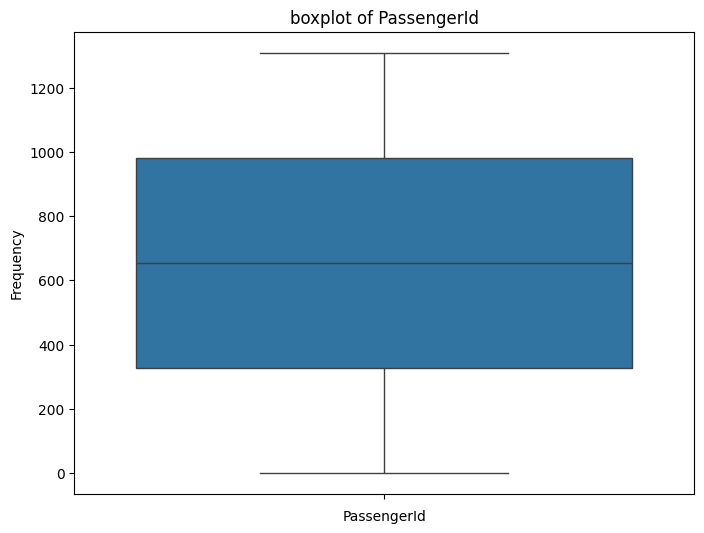

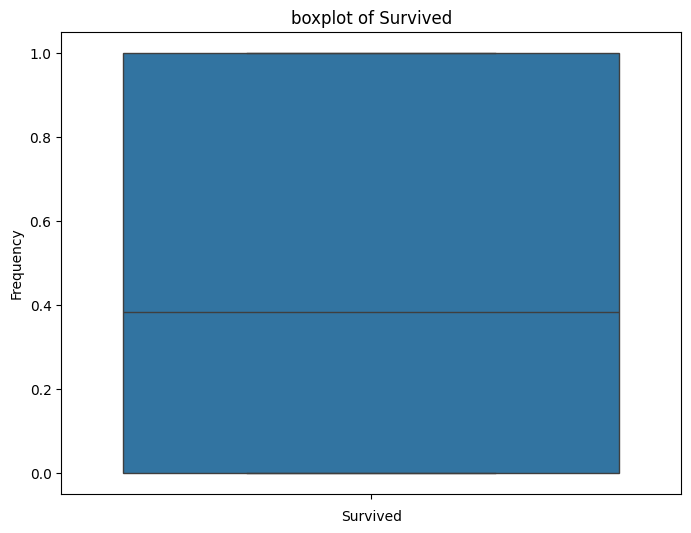

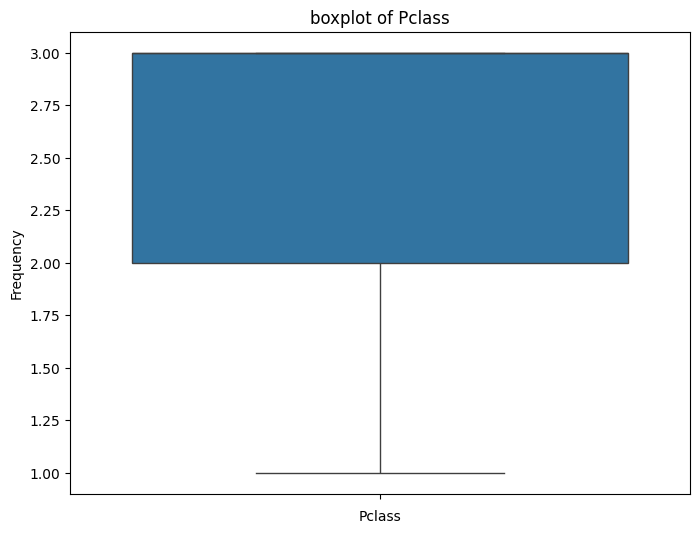

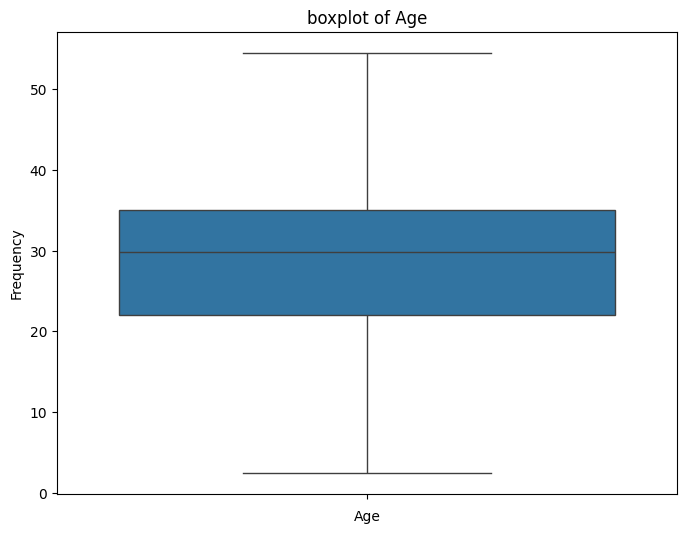

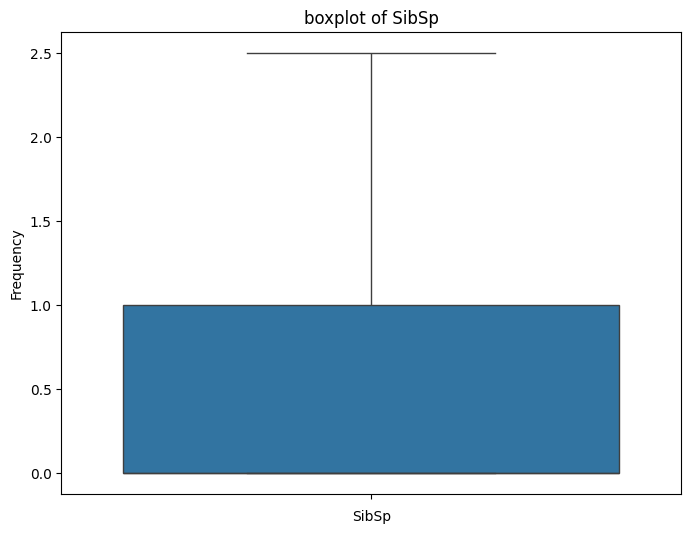

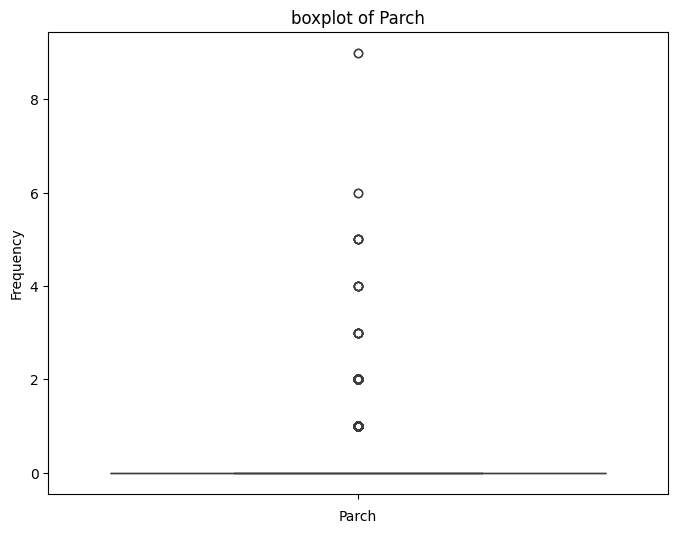

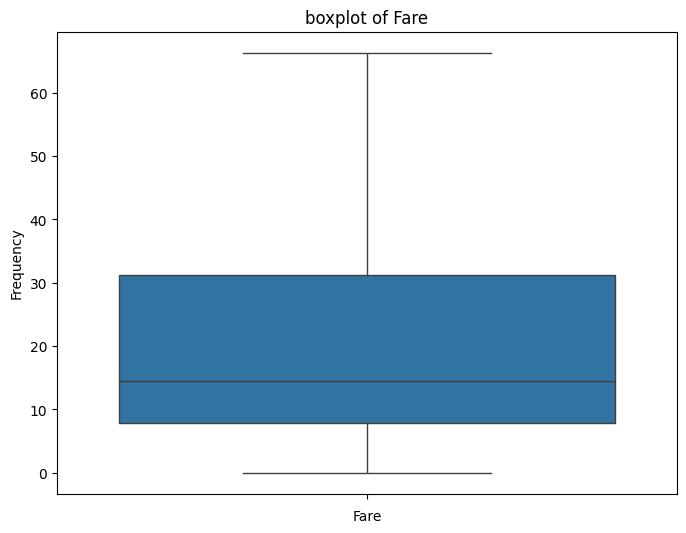

In [ ]:
# Boxplot for numerical data to find outliers
# Combine both datasets for a complete overview
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Iterate through each column and create a boxplot if the data type is numerical
for column in combined_data.columns:
    if pd.api.types.is_numeric_dtype(combined_data[column]):
        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.boxplot(combined_data[column])
        plt.title(f'boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
#From the boxplot we can see the outliers are fixed

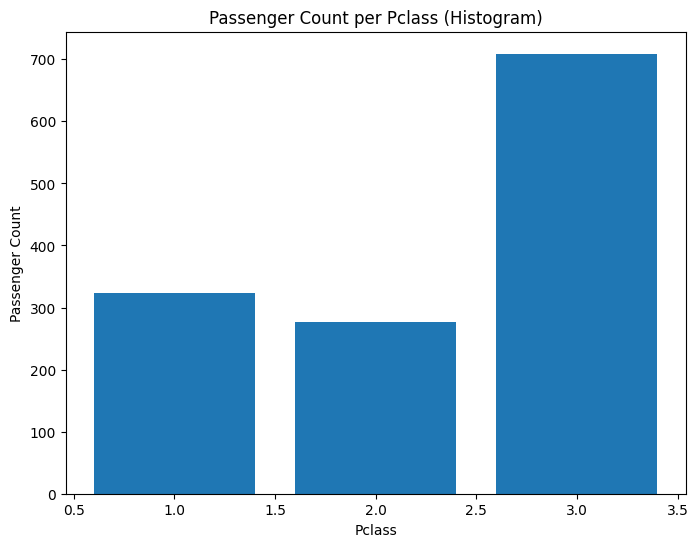

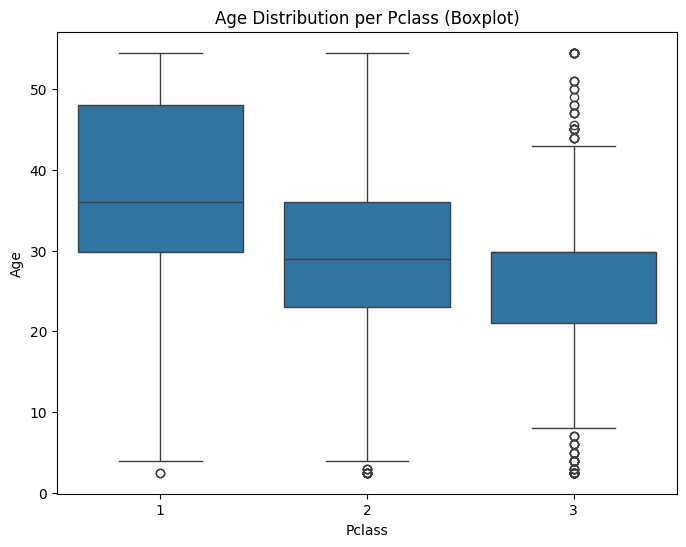

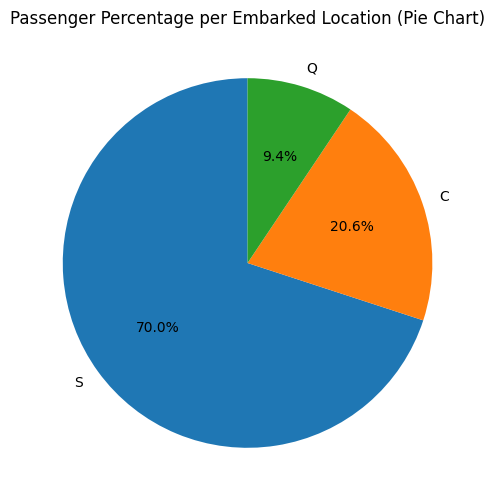

In [ ]:
# Passenger counts (e.g., per class or per embarkation point)
# Example: Passenger counts per Pclass
passenger_counts_pclass = combined_data['Pclass'].value_counts()

# Histogram
plt.figure(figsize=(8, 6))
plt.bar(passenger_counts_pclass.index, passenger_counts_pclass.values)
plt.xlabel("Pclass")
plt.ylabel("Passenger Count")
plt.title("Passenger Count per Pclass (Histogram)")
plt.show()


# Boxplot (Example: Age distribution across different Pclasses)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=combined_data)
plt.title("Age Distribution per Pclass (Boxplot)")
plt.show()


# Pie chart (Example: Percentage of passengers per Embarked location)
passenger_counts_embarked = combined_data['Embarked'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(passenger_counts_embarked, labels=passenger_counts_embarked.index, autopct='%1.1f%%', startangle=90)
plt.title("Passenger Percentage per Embarked Location (Pie Chart)")
plt.show()

In [ ]:
#from the visualization we can observe more no.of passengers are from pclass 3, pclass 1 age ranges from 30-48, pclass2 ranges from 23-35, pclass3 ranges from 20-30
#and there are more outliers in pclass 3 which might mean there are people of different age groups as well
#for embarked valued passenger percentage is port s= 70%, port c= 20.6%, port Q = 9.4%

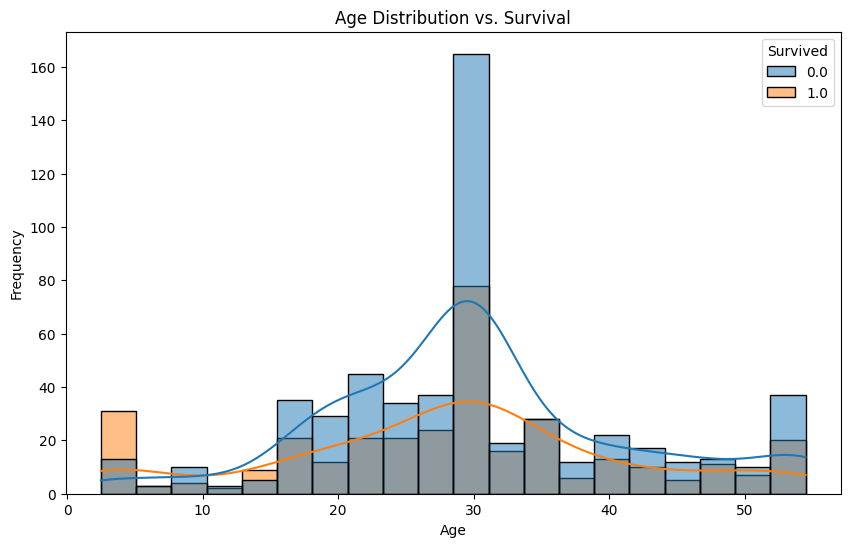

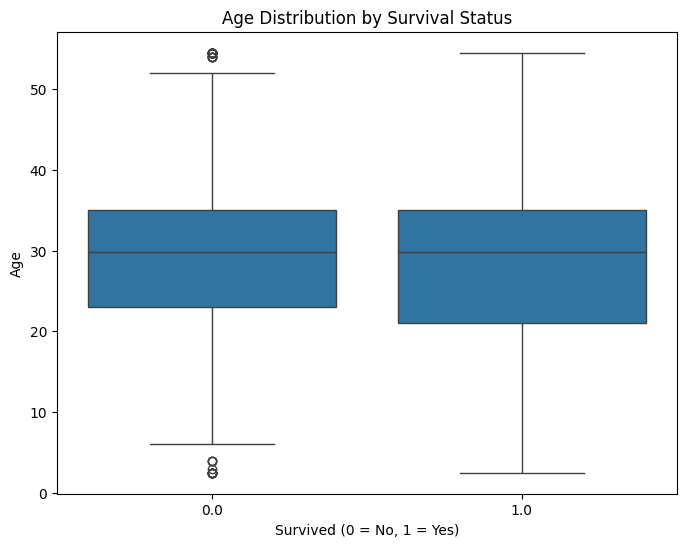

In [ ]:

# Histogram of Age distribution for Survived and Non-Survived passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=data_tr, x='Age', hue='Survived', kde=True)  # kde for density curve
plt.title('Age Distribution vs. Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of Age distribution for Survived and Non-Survived passengers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data_tr)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

In [ ]:
#From the boxplot more people who did'nt survive their age ranges from 23-35 and few outliers which might mean other age groups did not survive aas well
#People survived their age ranges from 20-35


Survived
0.0    549
1.0    342
Name: count, dtype: int64


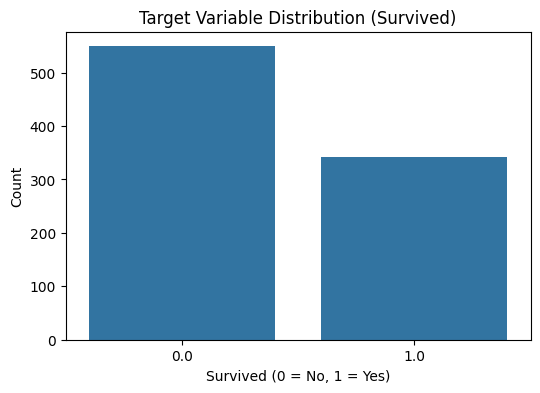

Survived
0.0    61.616162
1.0    38.383838
Name: proportion, dtype: float64


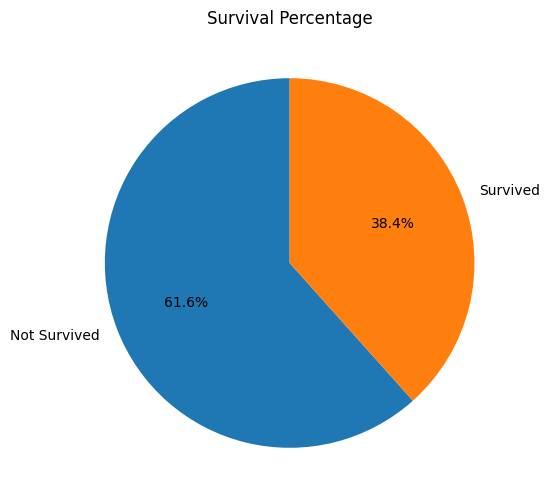

In [ ]:
# Target distribution for the 'Survived' column
survived_counts = data_tr['Survived'].value_counts()
print(survived_counts)

# Visualize the target distribution using a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data_tr)
plt.title('Target Variable Distribution (Survived)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Calculate and print the percentage of survived and not survived passengers
survived_percentage = data_tr['Survived'].value_counts(normalize=True) * 100
print(survived_percentage)

# Visualize the target distribution using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Percentage')
plt.show()

In [ ]:
# people survived- 549 , people not survived- 342
#Not survived percentage is 61.6%, survived percentage is 38.4%

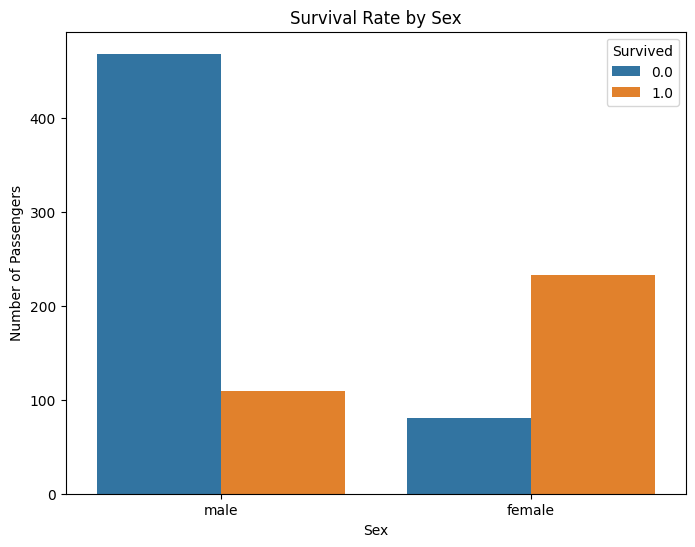

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# survival rate by gender

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data_tr)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Calculate survival rate by sex
survival_rate_by_sex = data_tr.groupby('Sex')['Survived'].mean()
survival_rate_by_sex

In [ ]:
# more than 400 male did not survive around 100 male survived, more than 200
# female survived and less than 100 female did not survive
#percentage of female survived is 74%, male survived is 18.89

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


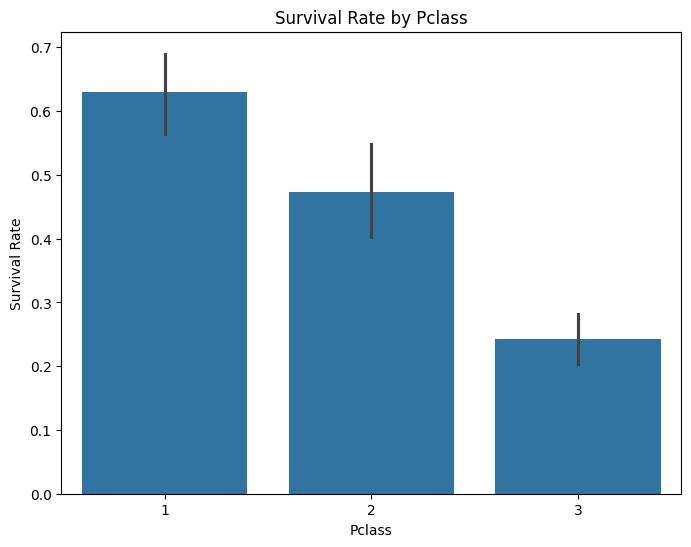

In [ ]:
# survival rate by pclass

# Calculate survival rate by Pclass
survival_rate_by_pclass = data_tr.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_pclass)

# Visualize survival rate by Pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data_tr)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# survival rate acoording to each class
#Pclass
#1   = 0.629630
#2   = 0.472826
#3   = 0.242363

In [ ]:
data_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,0.383838,3,"Kelly, Mr. James",male,34.5,0.0,0,330911,7.8292,C23 C25 C27,Q
892,893,0.383838,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0,363272,7.0000,C23 C25 C27,S
893,894,0.383838,2,"Myles, Mr. Thomas Francis",male,54.5,0.0,0,240276,9.6875,C23 C25 C27,Q
894,895,0.383838,3,"Wirz, Mr. Albert",male,27.0,0.0,0,315154,8.6625,C23 C25 C27,S
895,896,0.383838,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1,3101298,12.2875,C23 C25 C27,S


AgeGroup
0-18     0.481707
19-38    0.358156
39-49    0.382022
50+      0.364865
Name: Survived, dtype: float64


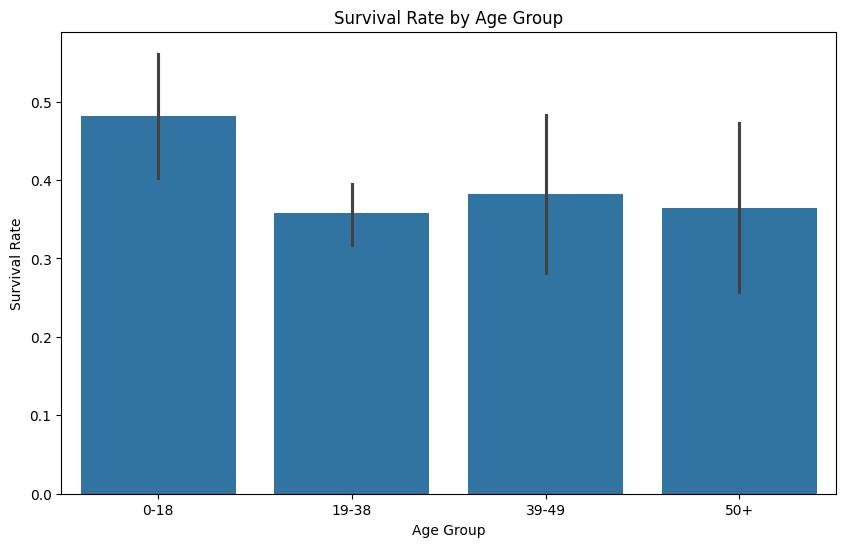

In [ ]:
# survial rate for age groups

# Creating age groups
bins = [0, 20, 40, 50, float('inf')]  # Define age group boundaries
labels = ['0-18', '19-38', '39-49', '50+']
data_tr['AgeGroup'] = pd.cut(data_tr['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rates for each age group
survival_rates = data_tr.groupby('AgeGroup')['Survived'].mean()

# Print the survival rates
print(survival_rates)

# Visualize survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=data_tr)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()



In [ ]:
#create new column age group by segregating age groups into ranges of '0-18', '19-38', '39-49', '50+' and survival rate for age group range from 0-18 is high, 0.48

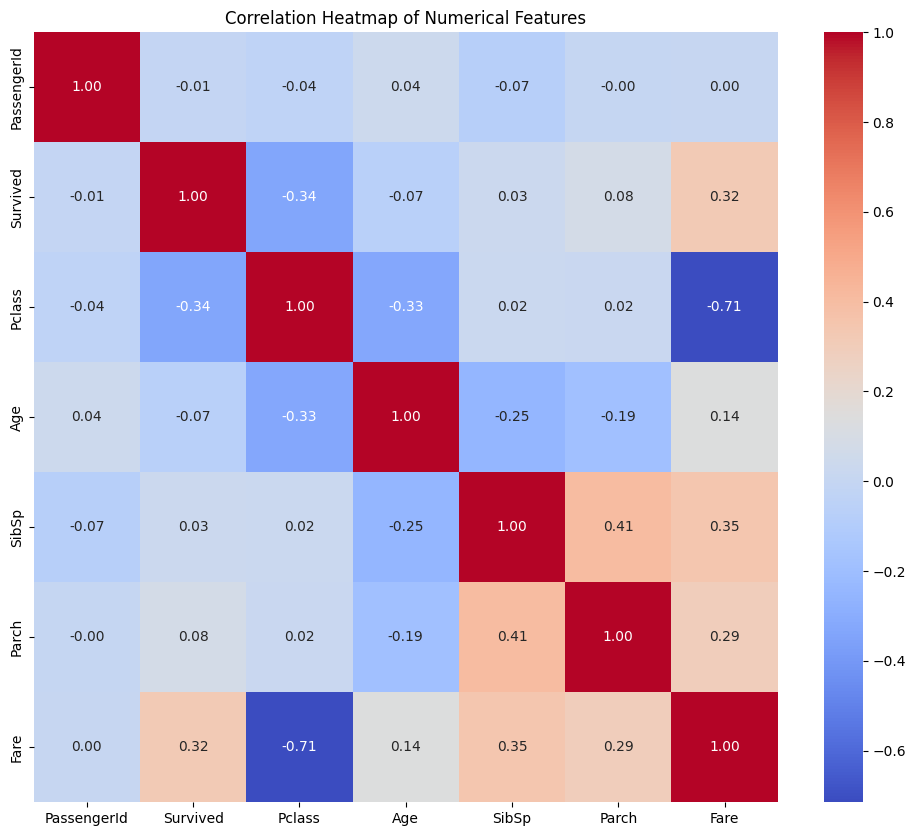

In [ ]:
#correlation for numerical data
# Select only numerical features for the correlation heatmap
numerical_features = data_tr.select_dtypes(include=np.number).columns
correlation_matrix = data_tr[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:

# Combine both datasets for a complete overview of categorical features
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Identify categorical columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns

# Describe categorical features
for col in categorical_cols:
  print(f"\nCategorical Feature: {col}")
  print(f"Unique values: {combined_data[col].unique()}")
  print(f"Number of unique values: {combined_data[col].nunique()}")
  print(combined_data[col].value_counts(normalize=True)) # shows percentage
  print("-" * 40)


Categorical Feature: Name
Unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
Number of unique values: 1307
Name
Connolly, Miss. Kate                                   0.001528
Kelly, Mr. James                                       0.001528
Braund, Mr. Owen Harris                                0.000764
Johnson, Master. Harold Theodor                        0.000764
Gustafsson, Mr. Alfred Ossian                          0.000764
                                                         ...   
Carter, Miss. Lucile Polk                              0.000764
Silvey, Mr. William Baird                              0.000764
Kallio, Mr. Nikolai Erland                             0.000764
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    0.000764
Peter, Master. Michael J                               0.000764
Name: proportion, Length:

In [ ]:
# to analyze the categorial data finding the number of unique values in each coloumn where

      #1. Name has 1307 unique values
      #2. Ticket has 929 unique values
      #3. Cabin has 186 unique values
      #4. embarked has 3 unique values

In [ ]:
def extract_title(name):
    return name.split(",")[1].split(".")[0].strip()

data_tr["Title"] = data_tr["Name"].apply(extract_title)

data_tr.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,C23 C25 C27,S,19-38,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,66.3438,C85,C,19-38,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,19-38,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S,19-38,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,C23 C25 C27,S,19-38,Mr


In [ ]:
data_te["Title"] = data_te["Name"].apply(extract_title)
data_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
891,892,0.383838,3,"Kelly, Mr. James",male,34.5,0.0,0,330911,7.8292,C23 C25 C27,Q,Mr
892,893,0.383838,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0,363272,7.0000,C23 C25 C27,S,Mrs
893,894,0.383838,2,"Myles, Mr. Thomas Francis",male,54.5,0.0,0,240276,9.6875,C23 C25 C27,Q,Mr
894,895,0.383838,3,"Wirz, Mr. Albert",male,27.0,0.0,0,315154,8.6625,C23 C25 C27,S,Mr
895,896,0.383838,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1,3101298,12.2875,C23 C25 C27,S,Mrs


In [ ]:
print(data_te["Title"].value_counts())
print(data_te.groupby("Title")["Survived"].sum())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64
Title
Col        0.767677
Dona       0.383838
Dr         0.383838
Master     8.060606
Miss      29.939394
Mr        92.121212
Mrs       27.636364
Ms         0.383838
Rev        0.767677
Name: Survived, dtype: float64


In [ ]:
print(data_tr["Title"].value_counts())
print(data_tr.groupby("Title")["Survived"].sum())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
Title
Capt              0.0
Col               1.0
Don               0.0
Dr                3.0
Jonkheer          0.0
Lady              1.0
Major             1.0
Master           23.0
Miss            127.0
Mlle              2.0
Mme               1.0
Mr               81.0
Mrs              99.0
Ms                1.0
Rev               0.0
Sir               1.0
the Countess      1.0
Name: Survived, dtype: float64


In [ ]:
# Define a dictionary to map titles to groups
title_map = {
    'Mr': 'Mr', 'Don': 'Mr', 'Sir': 'Mr', 'Capt': 'Mr', 'Major': 'Mr', 'Col': 'Mr',
    'Master': 'Master', 'Jonkheer': 'Master',
    'Mrs': 'Mrs', 'Mme': 'Mrs', 'Lady': 'Mrs',
    'Miss': 'Miss', 'Ms': 'Miss', 'Mlle': 'Miss'
}

# Use .get() to map titles, with a default value of 'Others'
# Changed 'train_data' to 'data_tr' to fix the NameError
data_tr["Title"] = data_tr["Title"].apply(lambda title: title_map.get(title, 'Others'))
data_te["Title"] = data_te["Title"].apply(lambda title: title_map.get(title, 'Others'))


In [ ]:
#now mapping the tiltles into Mr, Miss,Mrs,Master, others

In [ ]:
data_tr["Title"].value_counts()


,count
Title,
Mr,524
Miss,185
Mrs,127
Master,41
Others,14


In [ ]:
data_te["Title"].value_counts()

,count
Title,
Mr,242
Miss,79
Mrs,72
Master,21
Others,4


In [ ]:
# we have added a new coloum title by splitting the tittle from name which are
#Mr,Miss,Mrs,Master,Dr,Rev,Mlle,Major,Col,the Countess,Capt,Ms,Sir,Lady,Mme,Don,Jonkheer
#Limiting the title values to Mr, Mrs,Miss, Master, others and maaping remaining titles to these as suitable

In [ ]:
#giving values to categorial data
#     "Mrs": 2,
#     "Miss": 3,
#     "Master": 4,
#     "Others": 0

# Create mappings for ordinal encoding
sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
title_mapping = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Others": 0}

# Recreate the combined_data DataFrame with the 'Title' column included
combined_data = pd.concat([data_tr, data_te], ignore_index=True)

# Apply ordinal encoding to the combined dataset
combined_data['Sex'] = combined_data['Sex'].map(sex_mapping)
combined_data['Embarked'] = combined_data['Embarked'].map(embarked_mapping)
combined_data['Title'] = combined_data['Title'].map(title_mapping) # Now 'Title' column exists in combined_data


# Separate back into train and test sets
data_tr = combined_data.iloc[:data_tr.shape[0], :]
data_te = combined_data.iloc[data_tr.shape[0]:, :]

In [ ]:
# Create 'FamilySize' column by summing 'SibSp' and 'Parch' and adding 1 (for the person themself)
data_tr['FamilySize'] = data_tr['SibSp'] + data_tr['Parch'] + 1
data_te['FamilySize'] = data_te['SibSp'] + data_te['Parch'] + 1

def find_alone(size):
    if size <= 1:
        return 1
    else:
        return 0

# Access the correct column name 'FamilySize'
data_tr["isalone"] = data_tr["FamilySize"].apply(find_alone)
data_te["isalone"] = data_te["FamilySize"].apply(find_alone)

data_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,isalone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0,A/5 21171,7.2500,C23 C25 C27,2,19-38,1,2.0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,PC 17599,66.3438,C85,0,19-38,2,2.0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0,STON/O2. 3101282,7.9250,C23 C25 C27,2,19-38,3,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,113803,53.1000,C123,2,19-38,2,2.0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0.0,0,373450,8.0500,C23 C25 C27,2,19-38,1,1.0,1


In [ ]:
data_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,FamilySize,isalone
891,892,0.383838,3,"Kelly, Mr. James",0,34.5,0.0,0,330911,7.8292,C23 C25 C27,1,NaN,1,1.0,1
892,893,0.383838,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1.0,0,363272,7.0000,C23 C25 C27,2,NaN,2,2.0,0
893,894,0.383838,2,"Myles, Mr. Thomas Francis",0,54.5,0.0,0,240276,9.6875,C23 C25 C27,1,NaN,1,1.0,1
894,895,0.383838,3,"Wirz, Mr. Albert",0,27.0,0.0,0,315154,8.6625,C23 C25 C27,2,NaN,1,1.0,1
895,896,0.383838,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1.0,1,3101298,12.2875,C23 C25 C27,2,NaN,2,3.0,0


In [ ]:
#add new column family size by adding parch and sibsp to determine family size and adding 1 for the person itself

In [ ]:
data_tr.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# removing these cloumns 'Name','Ticket','PassengerId','Survived','agegroup' from test data
columns_to_remove = ['Name', 'Ticket', 'AgeGroup', 'PassengerId', 'Survived','Cabin' ]
data_te = data_te.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
data_te.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isalone
891,3,0,34.5,0.0,0,7.8292,1,1,1.0,1
892,3,1,47.0,1.0,0,7.0000,2,2,2.0,0
893,2,0,54.5,0.0,0,9.6875,1,1,1.0,1
894,3,0,27.0,0.0,0,8.6625,2,1,1.0,1
895,3,1,22.0,1.0,1,12.2875,2,2,3.0,0


In [ ]:
columns_to_remove = ['Name', 'Ticket', 'Cabin', 'PassengerId', 'AgeGroup', ]
data_tr = data_tr.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
data_tr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isalone
0,0.0,3,0,22.0,1.0,0,7.2500,2,1,2.0,0
1,1.0,1,1,38.0,1.0,0,66.3438,0,2,2.0,0
2,1.0,3,1,26.0,0.0,0,7.9250,2,3,1.0,1
3,1.0,1,1,35.0,1.0,0,53.1000,2,2,2.0,0
4,0.0,3,0,35.0,0.0,0,8.0500,2,1,1.0,1


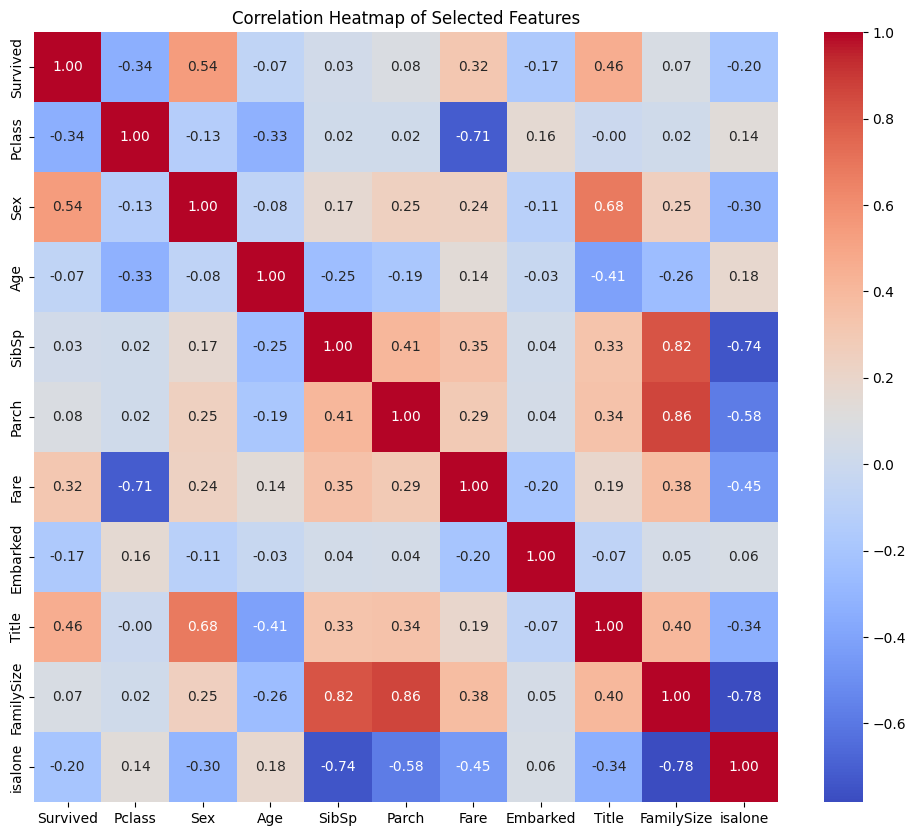

In [ ]:
# Create a correlation matrix for the specified columns
columns_for_correlation = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'isalone']
correlation_matrix = data_tr[columns_for_correlation].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

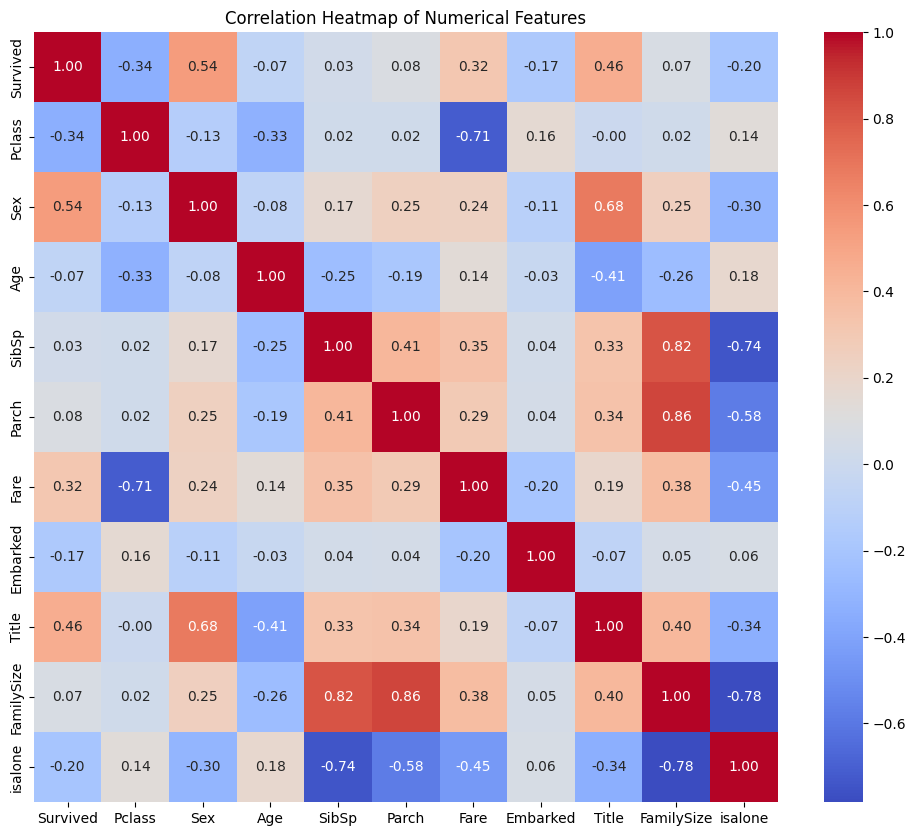

In [ ]:

# Select only numerical features for the correlation heatmap
numerical_features = data_tr.select_dtypes(include=np.number).columns
correlation_matrix = data_tr[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
# from the above heatmap we can observe the target variable survived has hight corelation with sex - 0.54
# and title -0.46, fare- 0.32

<Figure size 1000x1000 with 0 Axes>

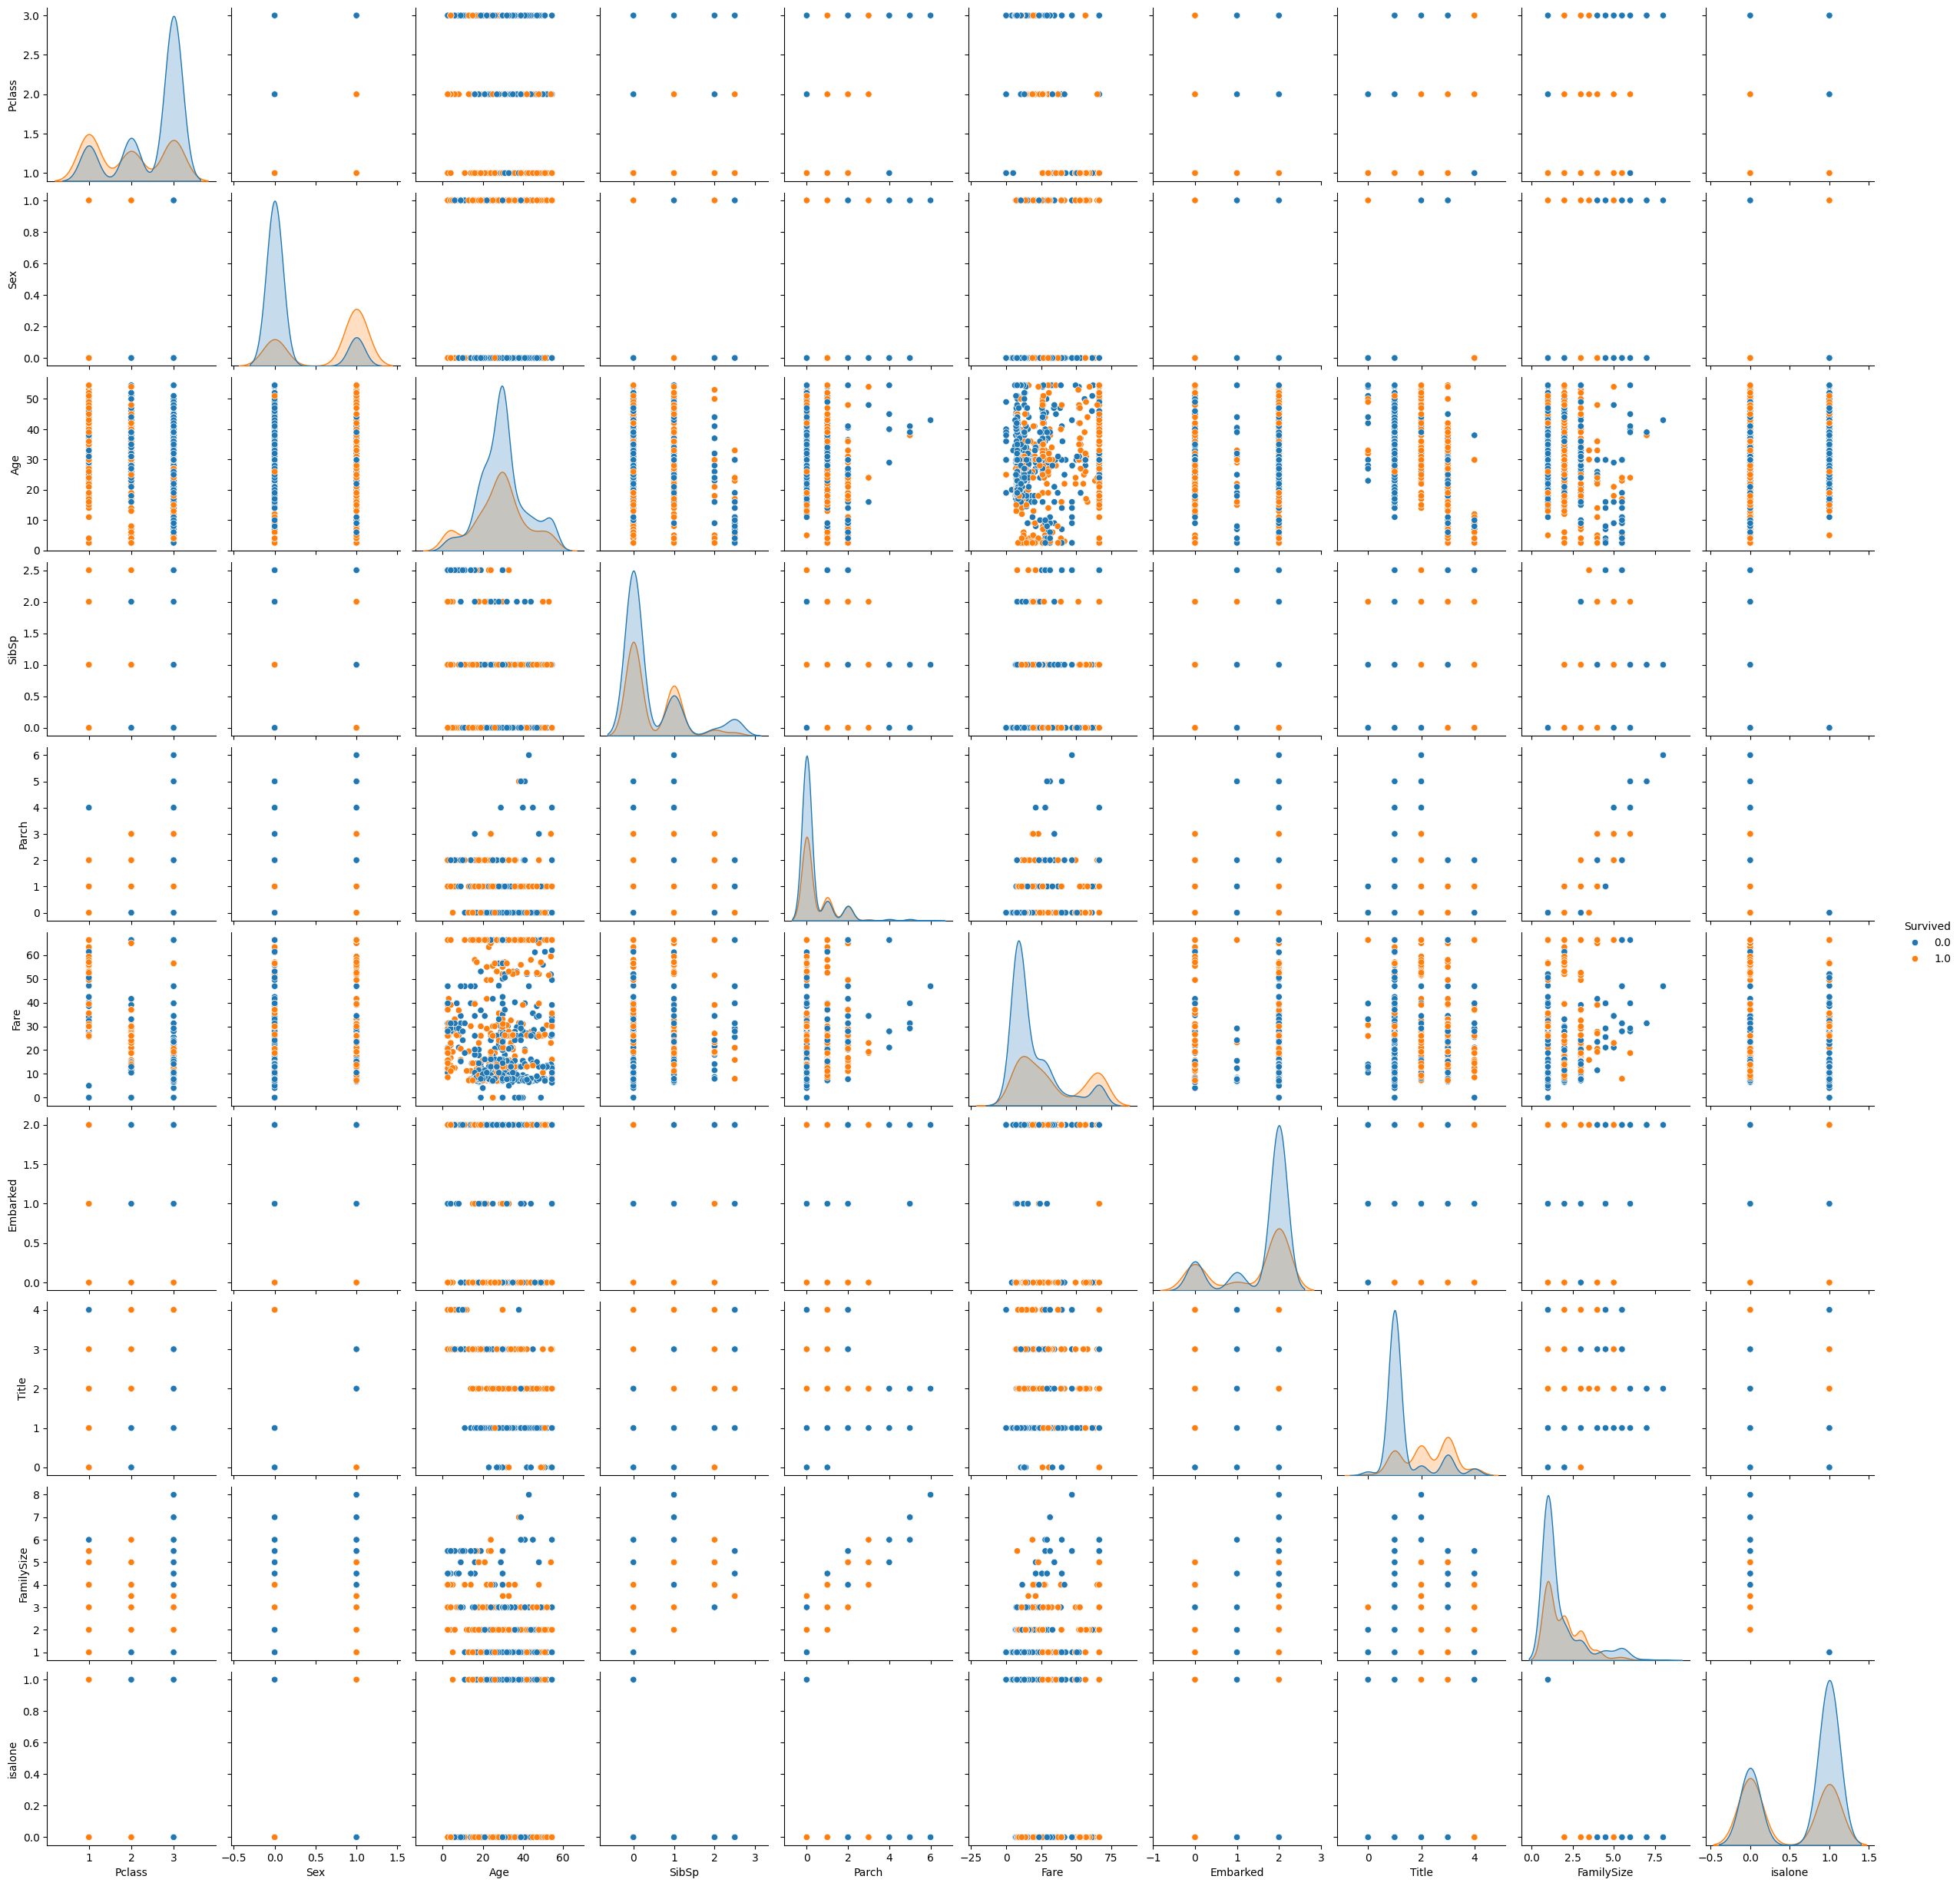

In [ ]:
#  pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(data_tr, hue='Survived')
plt.show()

#                                  **EDA PROCESS AND FINDINGS**



---

---


***Process : ***\
1.After importing the neccessary libraries, and reading the dataset we get the info of the dataset which gives the types of values that are present in the data set such as int, float, object etc. and the number of entries in the dataset etc.,
\
2.then we find the count ,mean ,standard deviation of data from which we can see whether the data is skewed by comapring the 75% to max value if the there is sudden jump or vast diff in values then we can assume the data is skewed
\
3.find the null values if present replace them with mean , median  and mode values mean,median for numerical data -if outliers present median and mode for categorial data
\
4.Visualize the data using


*   Histograms and density plots to visualize distributions.
*   Boxplots to detect outliers.

*   Scatter plots for numerical features to identify correlations.
*  Bar plots for categorical data.

*  Pairplots or correlation heatmaps for relationships among variables.
\
5.From the visualization if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value  then calulate upperbound and lowerbound values to fix them and apply log transform to fix skewness / e values.
\
6.Use Feature engineer if neccessary combine the coloumns or add new cloumns ,use label encoding for categorial data and scale or standardize the data so that all the data is in the same units without changing the range of data.
\
7.Analyse the correlation heatmap and find the coloumns that has hight correlation values with the target variable. Drop unesscary cloumns to improve the effeciency of the model


---


**FINDINGS**
\
1. train dataset has 891 rows and 12 coloumns test dataset has 418 rows and 12 coloumns
2. Name,sex and ticket coloumns has categorial data and remaining coloumns have numerical data
3. From 75% to max values the columns that might have skewness/outliers are
  
  *  Age
  *  SibSp
  *  Parch
  *  Fare
  *  PassengerId
4. Age, cabin and embarked columns have null values so age is numerical data cabin and embarked categorial so replacing missing values with mean and mode values respectively.
5. From Visualization of all numerical columns using histogram we can  observe age, parch, Sibsp, fare are sequed towards right / left which means it might contain outliers
6. from histogram
  * passenger id shows an even distribution across all passenger IDs from 0 to 1200
  *   age - the mode is 30 which means more people are of that age and age ranges between 0 to 80 and more individuals are present from a range of 20 to 40 years
  *   survived more than 500 people did not survive and more that 300 people survived
  *  pclass class 3 has more passenger more than 700 and class 1 and 2 has fewer passengers around 300
  * sibsp more than 800 people had no sbilings/spouse and around 300 people had 1 sibsp, and the very few has 3 or more sibsp, max number of sibsp is 8
  * parch more passengers has 0 i.e no parent child relation and max parch value appears to be 9
  * fare less than 100 comes under low fare and more passengers paid high fare
6. From the boxplot we can see outliers in age, sibsp,fare
  * age above around 55 and below 10 has outliers so both lower bound and upperbound data points should be fixed
  * sibsp above 2 has outliers , only upperbound outliers
  * fare above 800  has upperbound outliers
so using IQR method the outliers are fixed
7. Class 1 has more passengers and higher age groups around 30 to 48, class2 has age group around 23 to 35, class 3 has around 20 to 30 age groups #and there are more outliers in pclass 3 which might mean there are people of different age groups as well and for embarked valued passenger percentage is port s= 70%, port c= 20.6%, port Q = 9.4%
8. relation betweer age and survived
  * people around the age 20 to 36 have more survival rate
  * people survived- 549 , people not survived- 342
  * Not survived percentage is 61.6%, survived percentage is 38.4%
9. relation between gender and survival
  * more than 400 male did not survive around 100 male survived
  * female survived and less than 100 female did not survive
  * percentage of female survived is 74%, male survived is 18.89
10. relation between survival and pclass

  * Pclass
  * 1   = 0.629630
  * 2   = 0.472826
  * 3   = 0.242363  
11. using feature enginerring
  * create new column age group by segregating age groups into ranges of '0-18', '19-38', '39-49', '50+' and the survival rate of age group 0-18 is high compared to other age groups 0.48
  *  to analyze the categorial data finding the number of unique values in each coloumn where
     
      1. Name has 1307 unique values
      2. Ticket has 929 unique values
      3. Cabin has 186 unique values
      4. embarked has 3 unique values
   * Exact the title from name coloumn such as Mr. ,Miss etc and find the number of unique values Mr              517
     * (Miss            182,
Mrs             125,
Master           40,
Dr                7,
Rev               6,
Mlle              2,
Major             2,
Col               2,
the Countess      1,
Capt              1,
Ms                1,
Sir               1,
Lady              1,
Mme               1,
Don               1,
Jonkheer          1)
    * Mr        240
    * Miss       78
    *     Mrs        72
    * Master     21
    * Col         2
    * Rev         2
    * Ms          1
    * Dr          1
    * Dona     1
* now mapping the tiltles into Mr, Miss,Mrs,Master, others  and adding a new coloum title
* add new column family size by adding parch and sibsp to determine family size and adding 1 for the person itself
13. then assign numerical values for each title as "Mr":1, "Mrs": 2,"Miss": 3,"Master": 4,"Others": 0 for sex assign male as 0 female 1, emabarked c=0,q=1,s=2
14. add new column family size by adding parch and sibsp to determine family size and adding 1 for the person itself
15. from the heatmap we can observe the target variable survived has high corelation with sex - 0.54 and title -0.46, fare- 0.32
  * sex female has more survived passengers
  * passengers with high fare survived more

In [ ]:
#Predictions using logistic regresion
# Separate features (X) and target variable (y) for training data
X_tr = data_tr.drop('Survived', axis=1)
y_tr = data_tr['Survived']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42) # Example test_size

# Now you have X_train, X_val, y_train, y_val for model training and evaluation.
# data_te is your test set (X_test) for making predictions

# Example usage:
model = LogisticRegression()  # Replace with your desired model
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print(classification_report(y_val,predictions))
test_predictions = model.predict(data_te) # Predict on the actual test data
# # Now you can use 'test_predictions' to create your submission file.


              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Accuracy: 0.8100558659217877


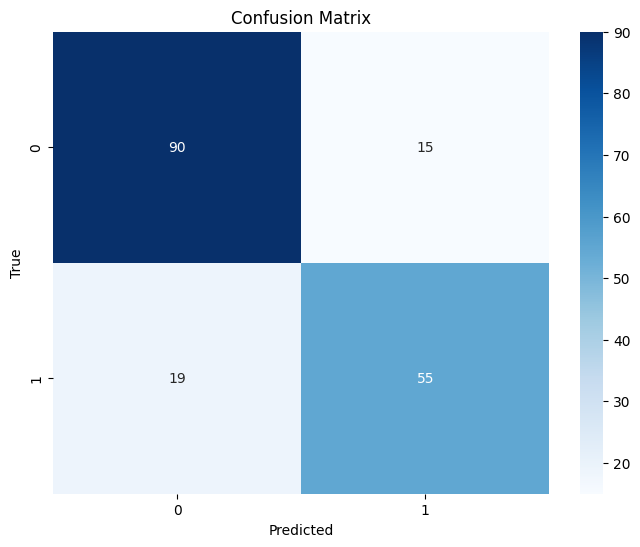

In [ ]:
# Predict on the validation set
val_predictions = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy: {accuracy}")

# Create and display the confusion matrix
cm = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
#prediction using random forest classification
# Separate features (X) and target variable (y) for training data
X_tr = data_tr.drop('Survived', axis=1)
y_tr = data_tr['Survived']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
rf_val_predictions = rf_model.predict(X_val)

# Evaluate the model
print(classification_report(y_val, rf_val_predictions))

# Make predictions on the test set
rf_test_predictions = rf_model.predict(data_te)

# Now you can use 'rf_test_predictions' for your submission file.
rf_test_predictions

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       105
         1.0       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [ ]:
# prompt: accuracy of random forest

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_val, rf_val_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8324022346368715


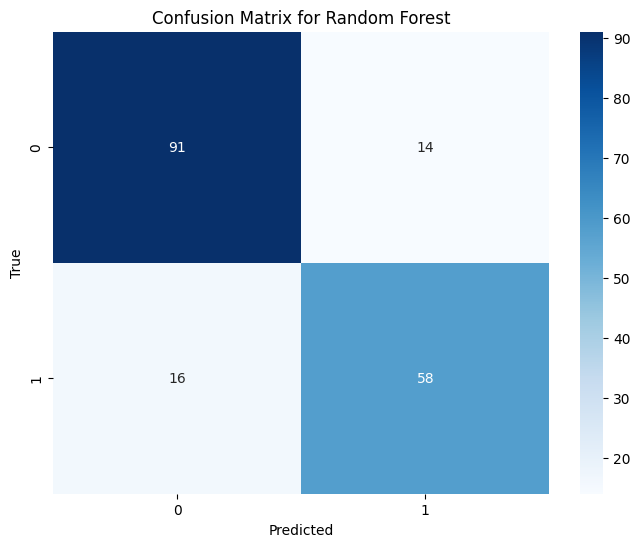

In [ ]:
#confusion matrix for random forest
# Predict on the validation set
rf_val_predictions = rf_model.predict(X_val)

# Create and display the confusion matrix
cm = confusion_matrix(y_val, rf_val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [ ]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be at a leaf node
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model
best_rf_val_predictions = best_rf_model.predict(X_val)
print(classification_report(y_val, best_rf_val_predictions))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [ ]:
# Logistic regression model has accuracy of 0.81
#randforest classification using parameter grid 0.82
#from the CM  of randon forest we can conclude that peeople that did not survive - 91, and people that survived - 58 which are true negative and true positive resp.
#so total no.of correct predictions is 149
# total no.of wrong predictions= 30
# where false positive is 14 people survived even though they did not , false negative is 16 people did not survive but model predicted they ssurvived
#So overall the accuracy of model is 0.8324